# **Medici√≥n de la polarizaci√≥n pol√≠tica en Colombia**

El siguiente es el c√≥digo utilizado en el ejercicio de medici√≥n de la polarizaci√≥n pol√≠tica en Colombia para luego realizar la proyecci√≥n de posibles escenarios pol√≠tico-electorales. Este es un ejercicio acad√©mico que toma datos p√∫blicos del programa *Congreso Visible* de la Universidad de los Andes.

Se describir√° el paso a paso de los c√°lculos para mayor comprensi√≥n del ejercicio y del [art√≠culo publicado](https://www.linkedin.com/pulse/c%25C3%25B3mo-medir-la-polarizaci%25C3%25B3n-pol%25C3%25ADtica-y-para-qu%25C3%25A9-grajales-bedoya-ezrne/).

In [ ]:
#Importaci√≥n de librer√≠as: Pandas, Numpy y Matplotlib
#El uso de estas librer√≠as facilitan los c√°lculos matem√°ticos y el modelado.
#Sklear.linear_model nos permitir√° utilizar un modelo de regresi√≥n para encontrar la relaci√≥n
#entre las variables que nos interesan: Tendencia pol√≠tica y √âxito electoral

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression


#Pre-procesamiento

# Cargar archivo
data = pd.read_csv("Polaridad_ordenado.csv", delimiter= ";")
print(data.head())

    A√±o              Partido  Tendencia  Curules
0  2022          Conservador         74       43
1  2022   Centro Democratico         70       29
2  2022      Partido de la U         69       26
3  2022              Liberal         67       46
4  2022  Liga Anticorrupcion         65        4


Graficar la relaci√≥n entre tendecia pol√≠tica y √©xito electoral para encontrar la ecuaci√≥n de correlaci√≥n:

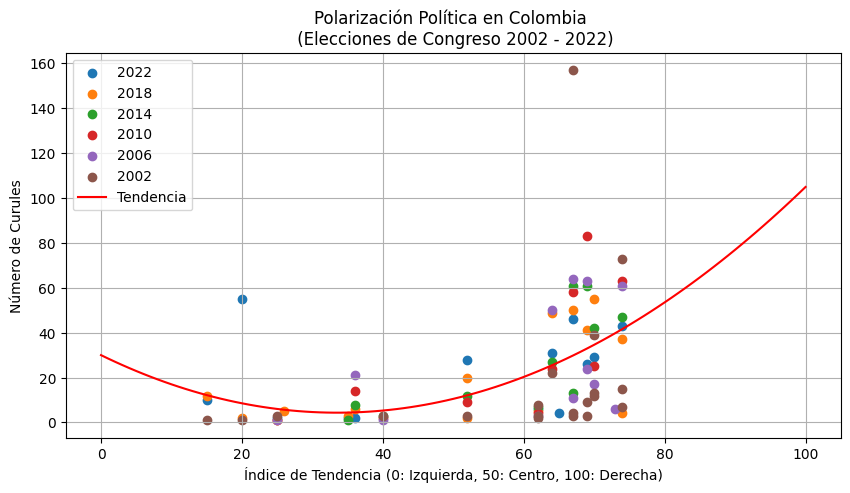

In [ ]:
# Procesamiento

# Graficar la dispersi√≥n de la polarizaci√≥n y la l√≠nea de tendencia
# Primero, separar los datos por a√±o para trazar la l√≠nea:
years = data['A√±o'].unique()

# Crear una gr√°fica de 10 pulgadas de ancho y 5 pulgadas de alto.
plt.figure(figsize=(10, 5))

#Iniciar un bucle para que sume los resultados de los a√±os electorales
#Para nuestro dataframe: 2002 a 2022

for year in years:
    yearly_data = data[data['A√±o'] == year]
    plt.scatter(yearly_data['Tendencia'], yearly_data['Curules'], label=year)

# C√°lculo y visualizaci√≥n de la l√≠nea de tendencia:
all_tendencia = data['Tendencia']
all_curules = data['Curules']

# Ajuste de una curva polin√≥mica de grado 2 por simplicidad
coefficients = np.polyfit(all_tendencia, all_curules, 2)
polynomial = np.poly1d(coefficients)
# Evaluaci√≥n de valores de 0 a 100 para generar los puntos de tendencia.
trendline = polynomial(np.arange(0, 101))

# Trazo de la l√≠nea de tendencia
plt.plot(np.arange(0, 101), trendline, color='red', linestyle='-', label='Tendencia')

# Etiquetas y t√≠tulos
plt.xlabel('√çndice de Tendencia (0: Izquierda, 50: Centro, 100: Derecha)')
plt.ylabel('N√∫mero de Curules')
plt.title(f'Polarizaci√≥n Pol√≠tica en Colombia \n (Elecciones de Congreso 2002 - 2022)')
plt.legend()
plt.grid(True)
plt.show()

Como necesitamos el √≠ndice de correlaci√≥n, vamos a utilizar los datos ya cargados para que Python haga los c√°lculos por nosotros:

In [ ]:
# Calcular la correlaci√≥n entre el √≠ndice de tendencia y el n√∫mero de curules
correlation = data['Tendencia'].corr(data['Curules'])

# Mostrar el resultado
correlation

0.43228259938861274

Una vez identificado el √≠ndice de relaci√≥n, vamos a averiguar el comportamiento por quintiles. Como estamos midiendo la polartizaci√≥n de 0 a 100 donde cero (0) es la extrema izquierda y cien (100) es la extrema derecha, necesitamos saber c√≥mo se mueven los datos cuando los resultados electorales se mueven por todo el espectro pol√≠tico:

In [ ]:
# A√±adir una columna de quintiles al dataframe
data['Quintil'] = pd.qcut(data['Tendencia'], 5, labels=[1, 2, 3, 4, 5])

# Calcular la correlaci√≥n entre el √≠ndice de tendencia y el n√∫mero de curules dentro de cada quintil
quintile_correlations = data.groupby('Quintil').apply(lambda x: x['Tendencia'].corr(x['Curules']))

# Mostrar los resultados
quintile_correlations

Quintil
1   -0.108675
2    0.053928
3    0.203402
4   -0.223390
5    0.399542
dtype: float64

En el [art√≠culo publicado](https://www.linkedin.com/pulse/c%25C3%25B3mo-medir-la-polarizaci%25C3%25B3n-pol%25C3%25ADtica-y-para-qu%25C3%25A9-grajales-bedoya-ezrne/) explico qu√© significa cada uno de esos valores y c√≥mo se comportan los partidos seg√∫n los resultados electorales desde la izquierda (quintil 1), los de centro y centroderecha (quintil 2 al 4) y los de derecha (quintil 5). Para este caso es suficiente ver su comportamiento mediante una gr√°fica üìä:  

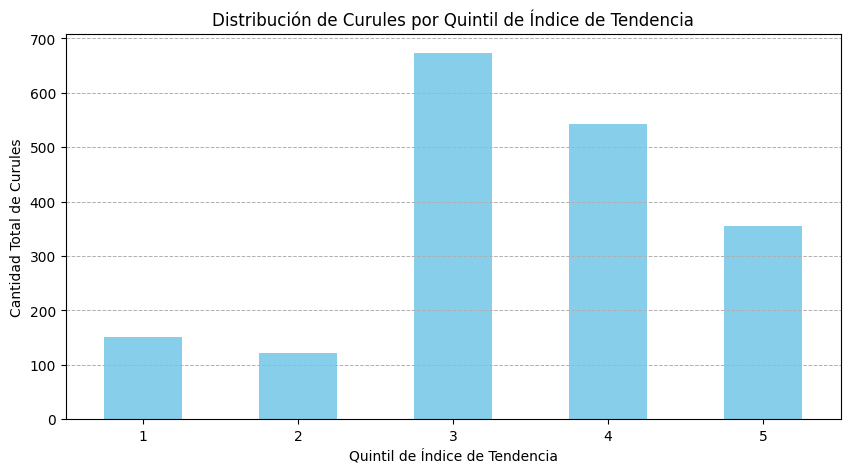

(1844,
 Quintil
 1     8.188720
 2     6.561822
 3    36.550976
 4    29.392625
 5    19.305857
 Name: Curules, dtype: float64)

In [ ]:
# Calcular la cantidad total de curules en cada quintil
# Desde la izquierda hasta la derecha pasando por el centro del espectro pol√≠tico:
total_curules = data['Curules'].sum()
curules_por_quintil = data.groupby('Quintil')['Curules'].sum()

# Calcular el porcentaje de curules en cada quintil
porcentaje_curules_por_quintil = (curules_por_quintil / total_curules) * 100

# Crear un gr√°fico de barras
plt.figure(figsize=(10, 5))
curules_por_quintil.plot(kind='bar', color='skyblue')

# A√±adir etiquetas y t√≠tulo
plt.xlabel('Quintil de √çndice de Tendencia')
plt.ylabel('Cantidad Total de Curules')
plt.title('Distribuci√≥n de Curules por Quintil de √çndice de Tendencia')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Mostrar el resultado
plt.show()
total_curules, porcentaje_curules_por_quintil

Ya hemos realizado una primera evaluaci√≥n de la correlaci√≥n entre el √≠ndice de tendencia y el n√∫mero de curules a nivel global (**0.43**). Para proporcionar un an√°lisis m√°s detallado del comportamiento electoral, se realiz√≥ la correlaci√≥n dentro de cada quintil:
*   Primer quintil: **-0.11**
*   Segundo quintil: **0.05**
*   Tercer quintil: **0.20**
*   Cuarto quintil: **-0.22**
*   Quinto quintil: **0.40**

Ahora, para realizar una proyecci√≥n de posibles cambios en la representaci√≥n pol√≠tica en funci√≥n de cambios en las tendencias o en el comportamiento electoral, vamos a encontrar la ecuaci√≥n de correlaci√≥n utilizando el modelo de regresi√≥n lineal:








In [ ]:
# Preparar los datos para el modelo de regresi√≥n que nos interesa:
# Tendencia pol√≠tica y √âxito electoral = Curules
X = data[['Tendencia']]
y = data['Curules']

# Crear y ajustar el modelo de regresi√≥n lineal
model = LinearRegression() # <--- Python hace todo por nosotros :)
model.fit(X, y)

# Calcular los coeficientes del modelo:
coeficiente = model.coef_[0]
intercepto = model.intercept_

# Mostrar los coeficientes del modelo:
coeficiente, intercepto

(0.6262284517480262, -11.862681918264311)

Armamos nuestra ecuaci√≥n:
*Curules* = 0.63 x *Tendencia* - 11.86

Y comenzamos a modelar la proyecci√≥n de escenarios...

Para este caso he planteado 4 escenarios que considero plausibles seg√∫n la TER y el contexto actual social y pol√≠tico en nuestro pa√≠s:
1.	üë®üèæ‚Äçüíº‚û°Ô∏è: El agente, decide marcarse un poco a la derecha dada las altas tasas de impopularidad del gobierno actual.
2.	‚¨ÖÔ∏èüë®üèæ‚Äçüíº: El agente, siendo simpatizante del gobierno actual decide ser m√°s radical en su posici√≥n pol√≠tica de izquierda.
3.	‚û°Ô∏èüë®üèæ‚Äçüíº‚¨ÖÔ∏è: El agente, siendo consciente que est√° en una posici√≥n de extremos (derecha o izquierda) decide moderar su discurso.
4.	‚¨ÖÔ∏èüë®üèæ‚Äçüíº‚û°Ô∏è: El agente, estando en una posici√≥n moderada, decide radicalizar su discurso hacia el extremo (izquierda o derecha).


In [ ]:
# Definici√≥n de escenarios
coeficiente = 0.63
intercepto = -11.86

escenarios = {
    'Si me muevo a la derecha': data['Tendencia'] + 5, # Si la campa√±a se mueve un poco a la derechaüë®üèæ‚Äçüíº‚û°Ô∏è
    'Si nos movemos a la izquierda': data['Tendencia'] - 5, # Si la campa√±a se mueve un poco a la izquierda ‚¨ÖÔ∏èüë®üèæ‚Äçüíº
    'Si moderamos el discurso': data['Tendencia'].apply(lambda x: 50 if x < 25 or x > 75 else x), # Si los extremos se moderan hacia el centro ‚û°Ô∏èüë®üèæ‚Äçüíº‚¨ÖÔ∏è
    'Si me radicalizo!': data['Tendencia'].apply(lambda x: 0 if x < 25 else (100 if x > 75 else x)) # Si las tendencias pol√≠ticas se polarizan ‚¨ÖÔ∏èüë®üèæ‚Äçüíº‚û°Ô∏è
}

#"Lambda" es una funci√≥n an√≥nima en Python que nos permite de manera r√°pida manejar los rangos de extremo a extremo (0 a 100),
# pero tambi√©n se podr√≠a usar de manera formal con 'def'.

# Usando la ecuaci√≥n de regresi√≥n lineal calculamos la cantidad de curules:
proyecciones = {}
for escenario, tendencias in escenarios.items():
    proyecciones[escenario] = coeficiente * tendencias + intercepto

# Suma total de curules proyectadas para cada escenario:
curules_proyectadas = {escenario: sum(proyeccion) for escenario, proyeccion in proyecciones.items()}

# Mostrar los resultados:
print(curules_proyectadas)


{'Si me muevo a la derecha': 2116.2599999999993, 'Si nos movemos a la izquierda': 1605.96, 'Si moderamos el discurso': 1983.9600000000003, 'Si me radicalizo!': 1794.9600000000003}


Finalmente, podemos hacer las interpretaciones seg√∫n los n√∫meros. En el [art√≠culo publicado](https://www.linkedin.com/pulse/c%25C3%25B3mo-medir-la-polarizaci%25C3%25B3n-pol%25C3%25ADtica-y-para-qu%25C3%25A9-grajales-bedoya-ezrne/) est√° m√°s ampliamente explicado cada punto, pero b√°sicamente lo que indican los n√∫meros es:

1. El escenario 1 sugiere que un desplazamiento uniforme hacia la derecha podr√≠a aumentar significativamente la representaci√≥n pol√≠tica, o sea, la cantidad de curules en el Congreso.ü§î

2. Un desplazamiento uniforme hacia la izquierda en el escenario 2 resultar√≠a en una disminuci√≥n considerable en la representaci√≥n pol√≠tica.‚ùé

3. En el escenario 3 los partidos m√°s extremos que se mueven hacia el centro resultan en una representaci√≥n total moderada. Es decir, es conveniente la moderaci√≥n del discurso y el relato en este momento.‚úå

4. Aumentar la polarizaci√≥n hacia los extremos muestra una representaci√≥n intermedia, menos que en el escenario de desplazamiento hacia el centro, pero m√°s que el decremento uniforme hacia la izquierda. Es decir, radicalizarse puede hacer perder votos.‚ö°

Estas proyecciones pueden ayudar a anticipar posibles futuros escenarios que permitan dise√±ar estrategias que maximicen la representaci√≥n y el impacto de los partidos pol√≠ticos o campa√±as electorales. Sin embargo, es importante recordar que los modelos son simplificaciones de la realidad y que factores impredecibles pueden influir en los resultados finales.